## Using the book review data attached to this project, perform the following:


Choose appropriate data processing steps and implement them. Please note that the objective is to be able to answer the questions below accurately, decide on your pre-processing step with this in mind.
    
- Plot the distribution of genres
- Plot the distribution of ratings
- Group the dataset by users, calculate the average of rating for each group and plot the average ratings (x-axis: ratings from 1-5, y-axis: count of users with that average rating)
- How many languages are there in the dataset? A plot of number of books per language is required here. Based on the plot, are there languages that you want to discard from your dataset?
- Use the different datasets accompanying the ratings dataset to determine what factors (publication year, ratings count, number of books by the author etc.) have an influence on a book’s rating?
- Is there any difference between the average rating of the users who rate more frequently than those who don’t?
- Based on the data, do you agree or disagree with the following hypothesis: “if a book has many volumes it is more likely that is higher rating”. Whether your answer is a yes or no explain why.

Note the following regarding presentation and grading:

    presentation schedules and method will be announced later
    powerpoint decks are not needed, but if it helps you to organize your presentation better I have no problem with it. However, I will focus on your code
    Please note that, although the mid-term project is group based, each team member is required to submit the group's code independently. This causes some redundancy but makes grading much easier and accurate

### Plot the distribution of genres

In [75]:
import pandas as pd
import os
import glob
 
# use glob to get all the csv files in the folder
dict = {}
path = r"C:\Users\anton\OneDrive\Documentos\Georgian\BDAT1007_Social_Data_Mining\MidTerm"
csv_files = glob.glob(os.path.join(path, "*.csv"))

for f in csv_files:
    #Split the pat and get only the filename without extension
    file_name = os.path.basename(f)
    file = os.path.splitext(file_name)
    # read the csv file and store in the dictionary
    dict[file[0]] = pd.read_csv(f)

In [76]:
#Saving all the files in df
book_tags = pd.DataFrame.from_dict(dict.get("book_tags"))
books = pd.DataFrame.from_dict(dict.get("books"))
ratings = pd.DataFrame.from_dict(dict.get("ratings"))
tags = pd.DataFrame.from_dict(dict.get("tags"))
to_read = pd.DataFrame.from_dict(dict.get("to_read"))

In [3]:
#check the tags that we have

tags["genre"] = tags[("tag_name").split()]
print("Total categories in the genre:\n", tags["genre"].value_counts(),"\n")

Total categories in the genre:
 -               1
oz              1
p-d-f           1
p-d-eastman     1
p-cornwell      1
               ..
farm-life       1
farm-animals    1
farm            1
farley-mowat    1
ｆａｖｏｕｒｉｔｅｓ      1
Name: genre, Length: 34252, dtype: int64 



In [51]:
from sklearn import *
# TF-IDF Feature Generation
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import RegexpTokenizer

# Initialize regex tokenizer
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(tags["tag_name"])

# Check Shape of Count Vector
X_train_counts.shape

(34252, 16450)

In [53]:
# Import KMeans Model
from sklearn.cluster import KMeans

# Create Kmeans object and fit it to the data
# we couldn't include our own groups so we let the algorithm to group in 20 categories
kmeans = KMeans(n_clusters=20).fit(X_train_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_

In [ ]:
from sklearn import metrics
# Compute DBI score
dbi = metrics.davies_bouldin_score(X_train_counts.toarray(), pred_labels)

# Compute Silhoutte Score
ss = metrics.silhouette_score(X_train_counts.toarray(), pred_labels , metric='euclidean')

# Print the DBI and Silhoutte Scores
print("DBI Score: ", dbi, "\nSilhoutte Score: ", ss)

In [54]:
#Now we checked the groups formed

tags["group"] = pred_labels
#dataframe[dataframe['Percentage'] > 70]
tags[tags["group"] ==1]
#the result categories are:
#variety, manga, fiction, women, read books, arab, books, fantasy, middle, kids, children, read, book, james, hyphen, 2016, romance, Stephen King, -s, related

,tag_id,tag_name,genre,group
691,691,2012-debut-author-challenge,2012-debut-author-challenge,1
714,714,2013-debut-author-challenge,2013-debut-author-challenge,1
2221,2221,amazing-first-work-by-author,amazing-first-work-by-author,1
2281,2281,american-author,american-author,1
3439,3439,aussie-author,aussie-author,1
...,...,...,...,...
30604,30604,to-read-author-a-e,to-read-author-a-e,1
31665,31665,utah-author,utah-author,1
32679,32679,woman-author,woman-author,1
33140,33140,young-author-recommendations,young-author-recommendations,1


In [77]:
#To improve thhe results we are going to remove the hyphen symbol in the tags df
tags["tag_name"] = tags["tag_name"].str.replace('-', ' ')
#removing alone characters to improve the results

tags["tag_name"] = tags["tag_name"].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')
tags.head()

C:\Users\anton\AppData\Local\Temp/ipykernel_4084/132396117.py:5: FutureWarning: The default value of regex will change from True to False in a future version.
  tags["tag_name"] = tags["tag_name"].str.replace(r'\b\w\b', '').str.replace(r'\s+', ' ')


,tag_id,tag_name
0,0,
1,1,
2,2,10
3,3,12
4,4,122


### Now we re run the process with the tags fixed

In [78]:
tokenizer = RegexpTokenizer(r'\w+')

# # Vectorize document using TF-IDF
tf_idf_vect = TfidfVectorizer(lowercase=True,
                        stop_words='english',
                        ngram_range = (1,1),
                        tokenizer = tokenizer.tokenize)

# Fit and Transfrom Text Data
X_train_counts = tf_idf_vect.fit_transform(tags["tag_name"])

# Check Shape of Count Vector
X_train_counts.shape

# Create Kmeans object and fit it to the training data 
kmeans = KMeans(n_clusters=20).fit(X_train_counts)

# Get the labels using KMeans
pred_labels = kmeans.labels_


tags["group"] = pred_labels

In [79]:
genre = ["various", "romance", "school", "best books", "other books", "reading", "read", "learning", "lit", "series", "novels", "summer", 
                 "brown", "philosophy", "owned", "fiction", "wish", "game", "kids", "reads"]
genredf = pd.DataFrame(genre)
ntags = tags.merge(genredf, how='left', left_on="group", right_on=genredf.index)
ntags.rename({0: 'genre'}, axis=1, inplace=True)

#Now we join the books with the booktags and then with the tags table to get the genre by book.
#we are going to do the plot with the full data (but there are a lot of books in several categories,
#and other plot with only the first genre per book

books_genre_full = books.merge(book_tags, how='left', left_on="book_id", right_on= "goodreads_book_id")
books_genre_full = books_genre_full.merge(ntags, how='left', on ="tag_id")
books_genre_unique = books_genre_full
books_genre_unique = books_genre_unique.drop_duplicates(subset=['book_id'])

books_genre_unique.head()

,id,book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,ratings_4,ratings_5,image_url,small_image_url,goodreads_book_id,tag_id,count,tag_name,group,genre
0,1,2767052,2767052,2792775,272,439023483,9.780439e+12,Suzanne Collins,2008.0,The Hunger Games,...,1481305,2706317,https://images.gr-assets.com/books/1447303603m...,https://images.gr-assets.com/books/1447303603s...,2767052,11557,50755,favorites,1,romance
100,2,3,3,4640799,491,439554934,9.780440e+12,"J.K. Rowling, Mary GrandPré",1997.0,Harry Potter and the Philosopher's Stone,...,1156318,3011543,https://images.gr-assets.com/books/1474154022m...,https://images.gr-assets.com/books/1474154022s...,3,30574,496107,to read,2,school
200,3,41865,41865,3212258,226,316015849,9.780316e+12,Stephenie Meyer,2005.0,Twilight,...,875073,1355439,https://images.gr-assets.com/books/1361039443m...,https://images.gr-assets.com/books/1361039443s...,41865,33114,16446,young adult,8,lit
300,4,2657,2657,3275794,487,61120081,9.780061e+12,Harper Lee,1960.0,To Kill a Mockingbird,...,1001952,1714267,https://images.gr-assets.com/books/1361975680m...,https://images.gr-assets.com/books/1361975680s...,2657,7457,31068,classics,1,romance
400,5,4671,4671,245494,1356,743273567,9.780743e+12,F. Scott Fitzgerald,1925.0,The Great Gatsby,...,936012,947718,https://images.gr-assets.com/books/1490528560m...,https://images.gr-assets.com/books/1490528560s...,4671,7457,32061,classics,1,romance


In [83]:
#we save our data in a df to plot
fplot_df = (books_genre_full["genre"].value_counts()).to_frame()
fplot_df.reset_index(inplace=True)

<BarContainer object of 20 artists>

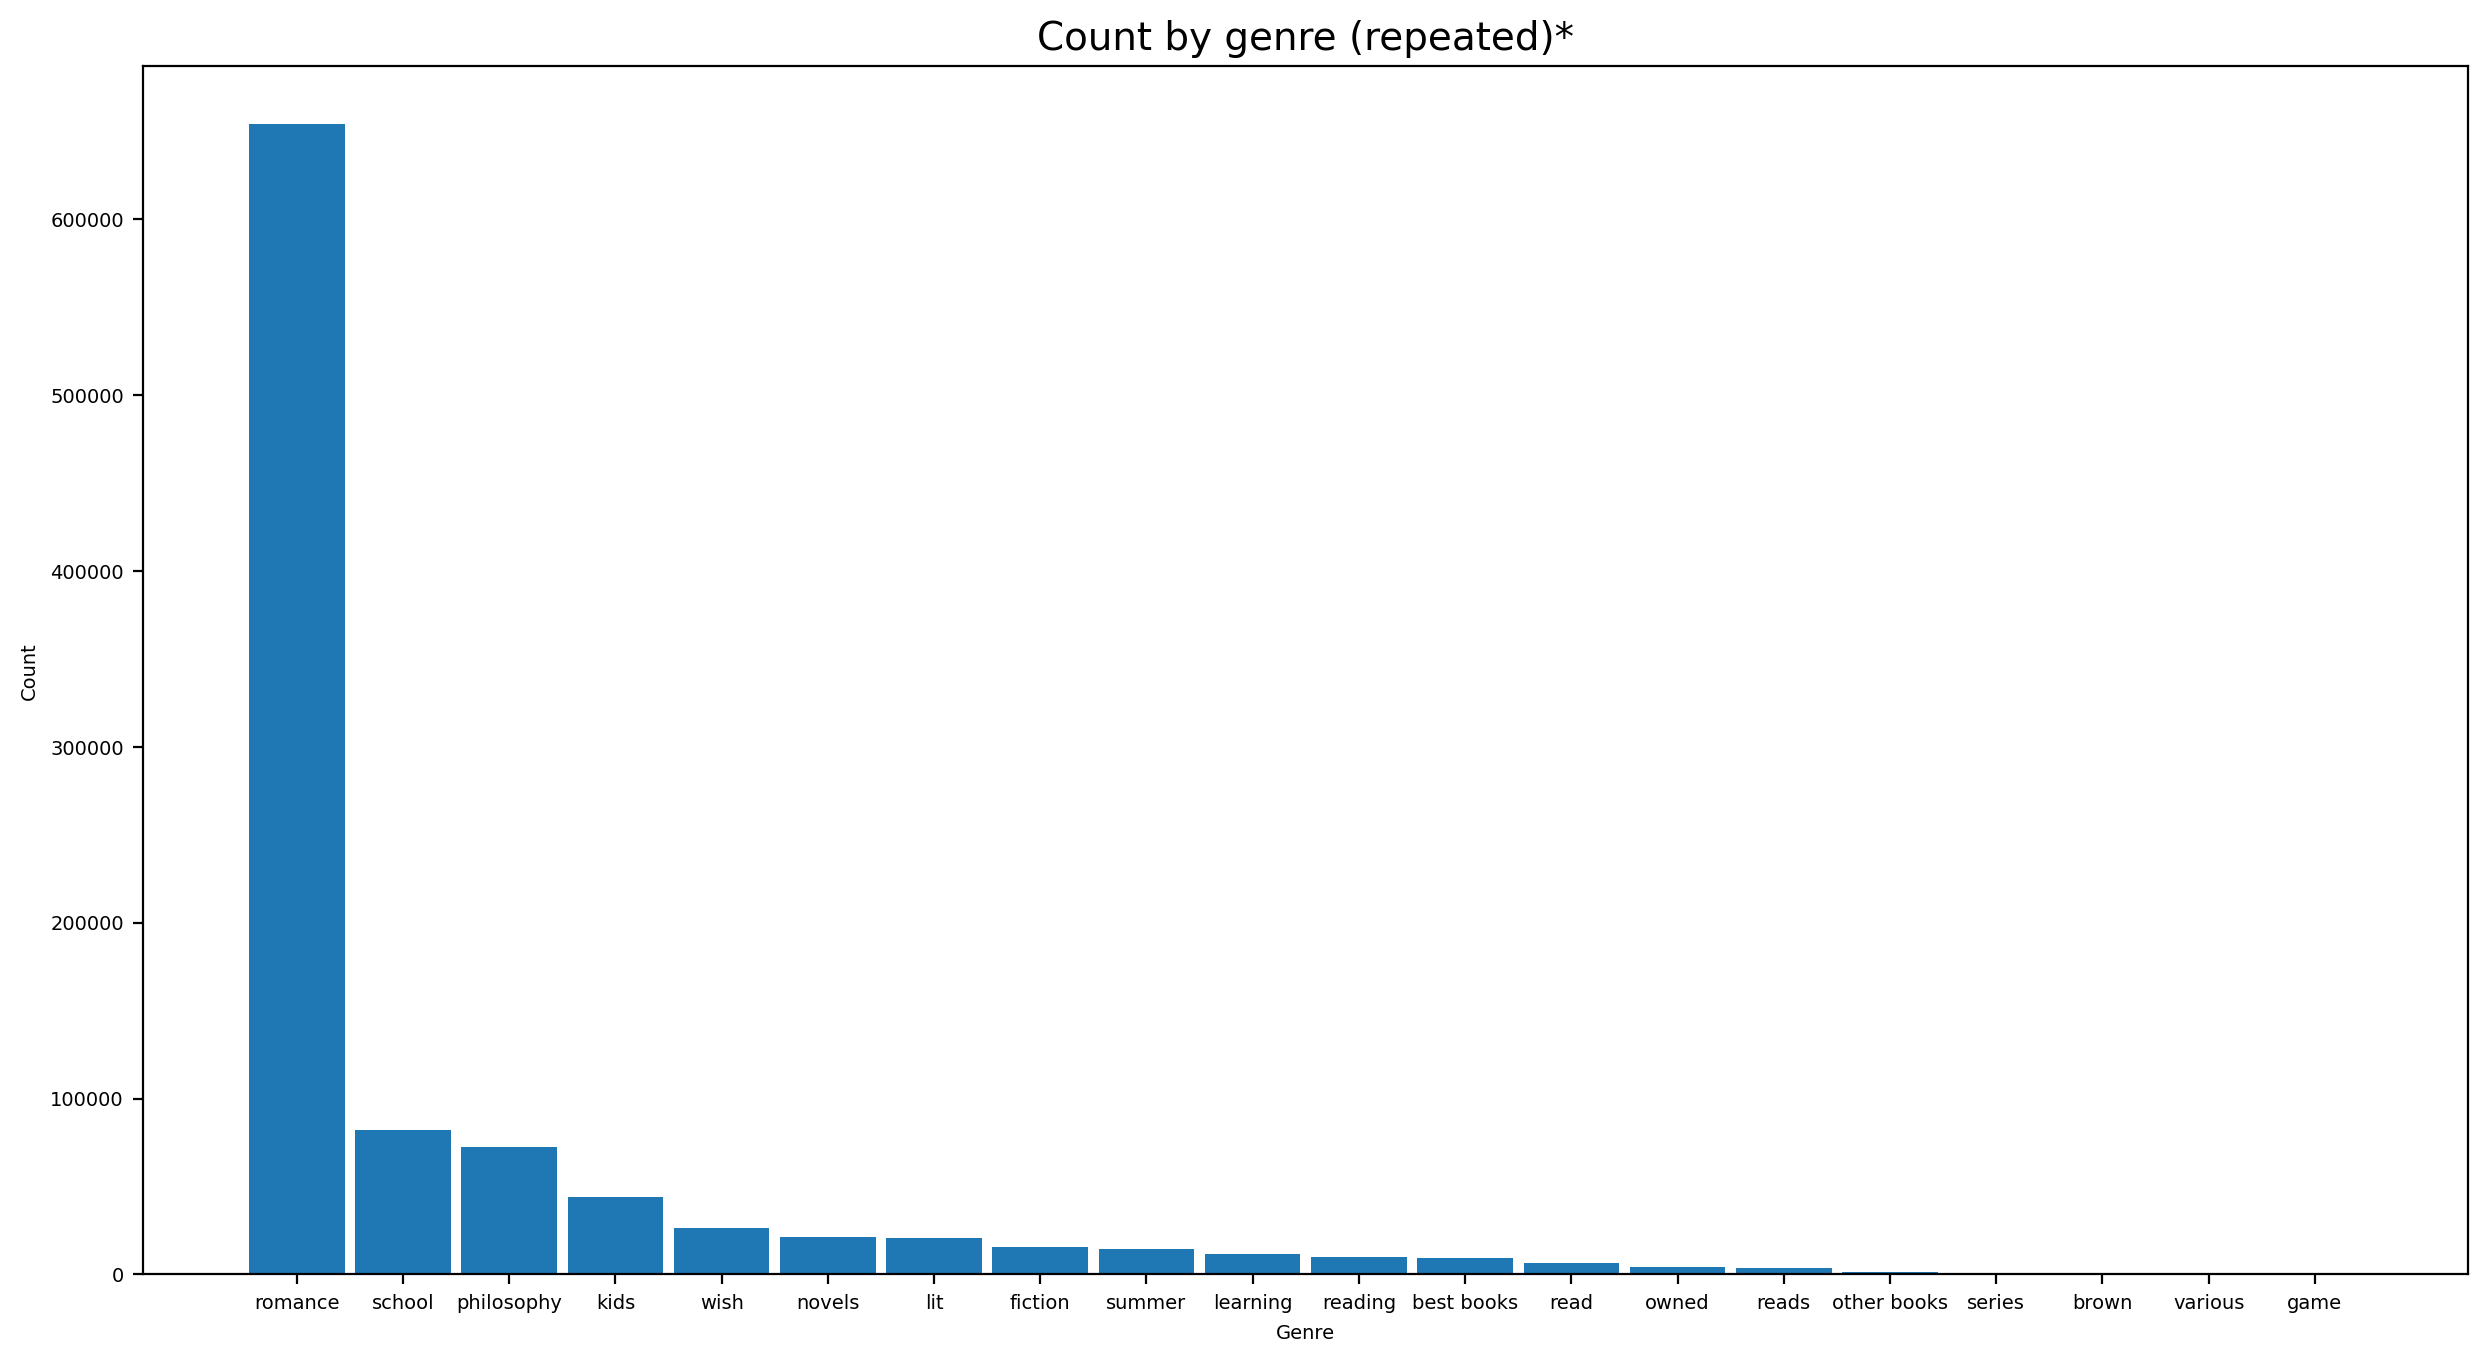

In [84]:
#Now we call the lybrary and define the parameters to plot the graph
#This graph is with the tags repeated, A book can be in several groups
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size': 7})
plt.title("Count by genre (repeated)*", fontsize=14, fontweight=0)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.bar(fplot_df["index"], fplot_df["genre"], width = 0.9)

In [92]:
#we save our data in a df to plot, this is the graph with unique values selecting only the first
fplot_df = (books_genre_unique["genre"].value_counts()).to_frame()
fplot_df.reset_index(inplace=True)

<BarContainer object of 11 artists>

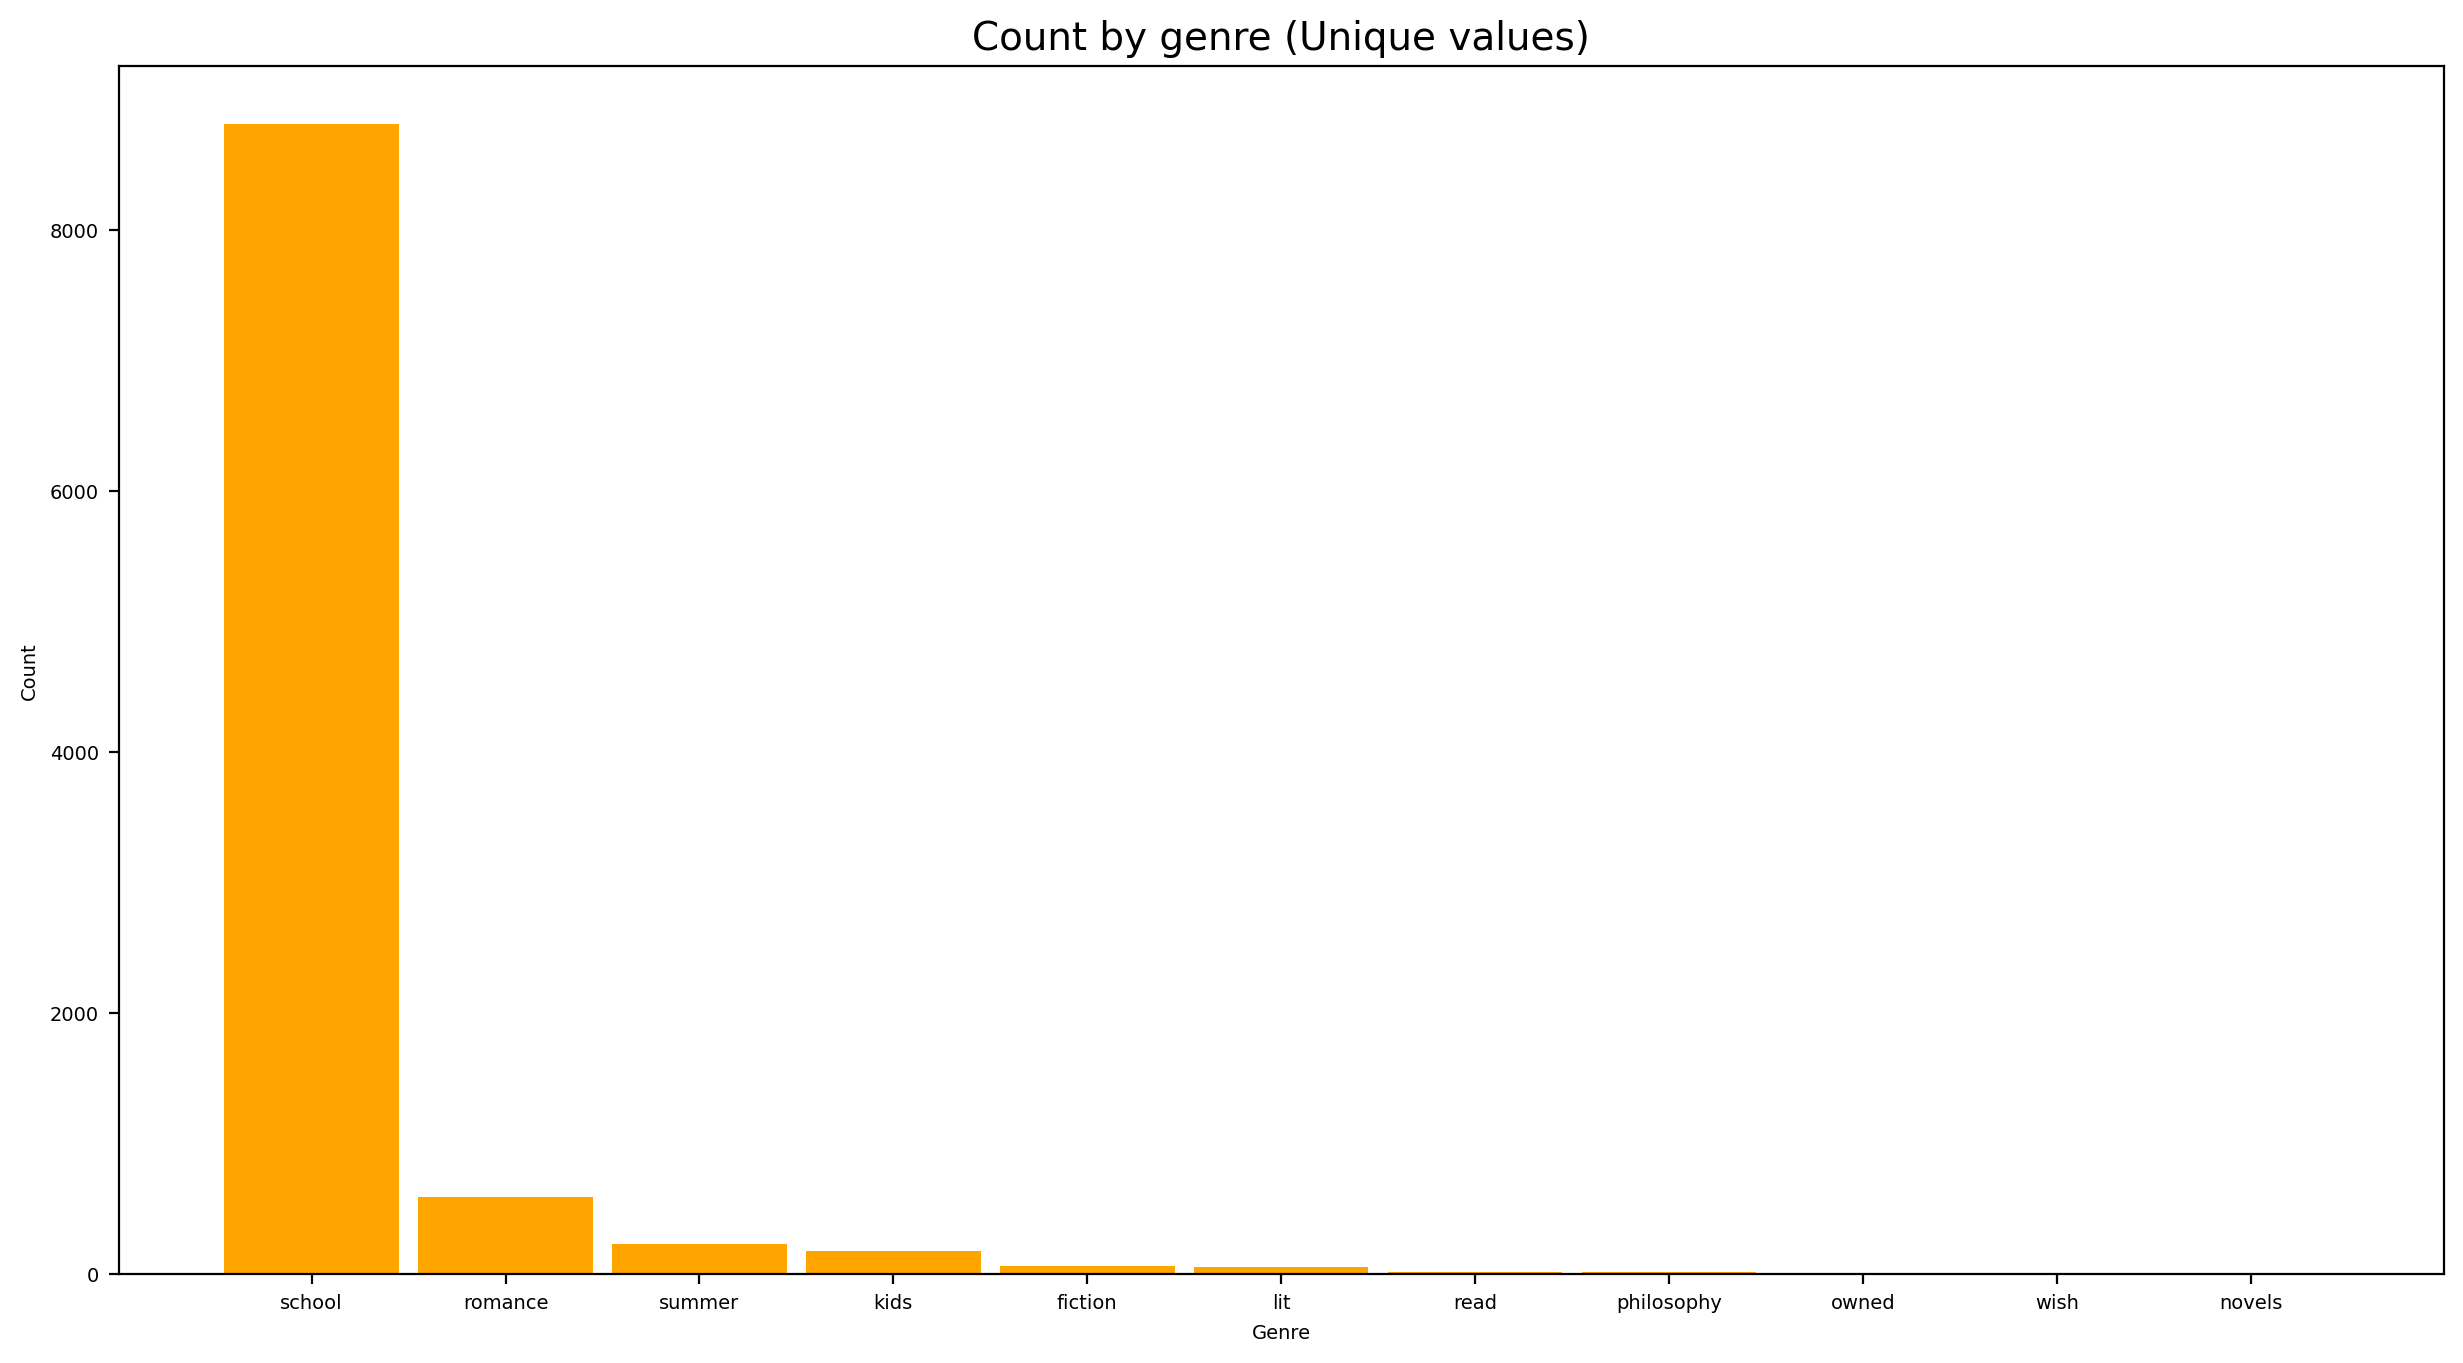

In [94]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size': 7})
plt.title("Count by genre (Unique values)", fontsize=14, fontweight=0)
plt.xlabel("Genre")
plt.ylabel("Count")
plt.bar(fplot_df["index"], fplot_df["genre"], width = 0.9, color="orange")

### Plot the distribution of ratings

To plot the ratings we will use the genre field that we created, we are going to use the field *average_rating* and genre, our approach is to make an average of the average ratings by genre

In [103]:
ratings_df = (books_genre_unique
              .groupby('genre')['average_rating']
              .mean()).to_frame()
ratings_df.reset_index(inplace=True)

,genre,average_rating
0,fiction,4.001194
1,kids,3.853187
2,lit,3.958305
3,novels,3.990000
4,owned,4.364286
5,philosophy,4.178750
6,read,3.947143
7,romance,4.059782
8,school,4.002729
9,summer,3.944894


<BarContainer object of 11 artists>

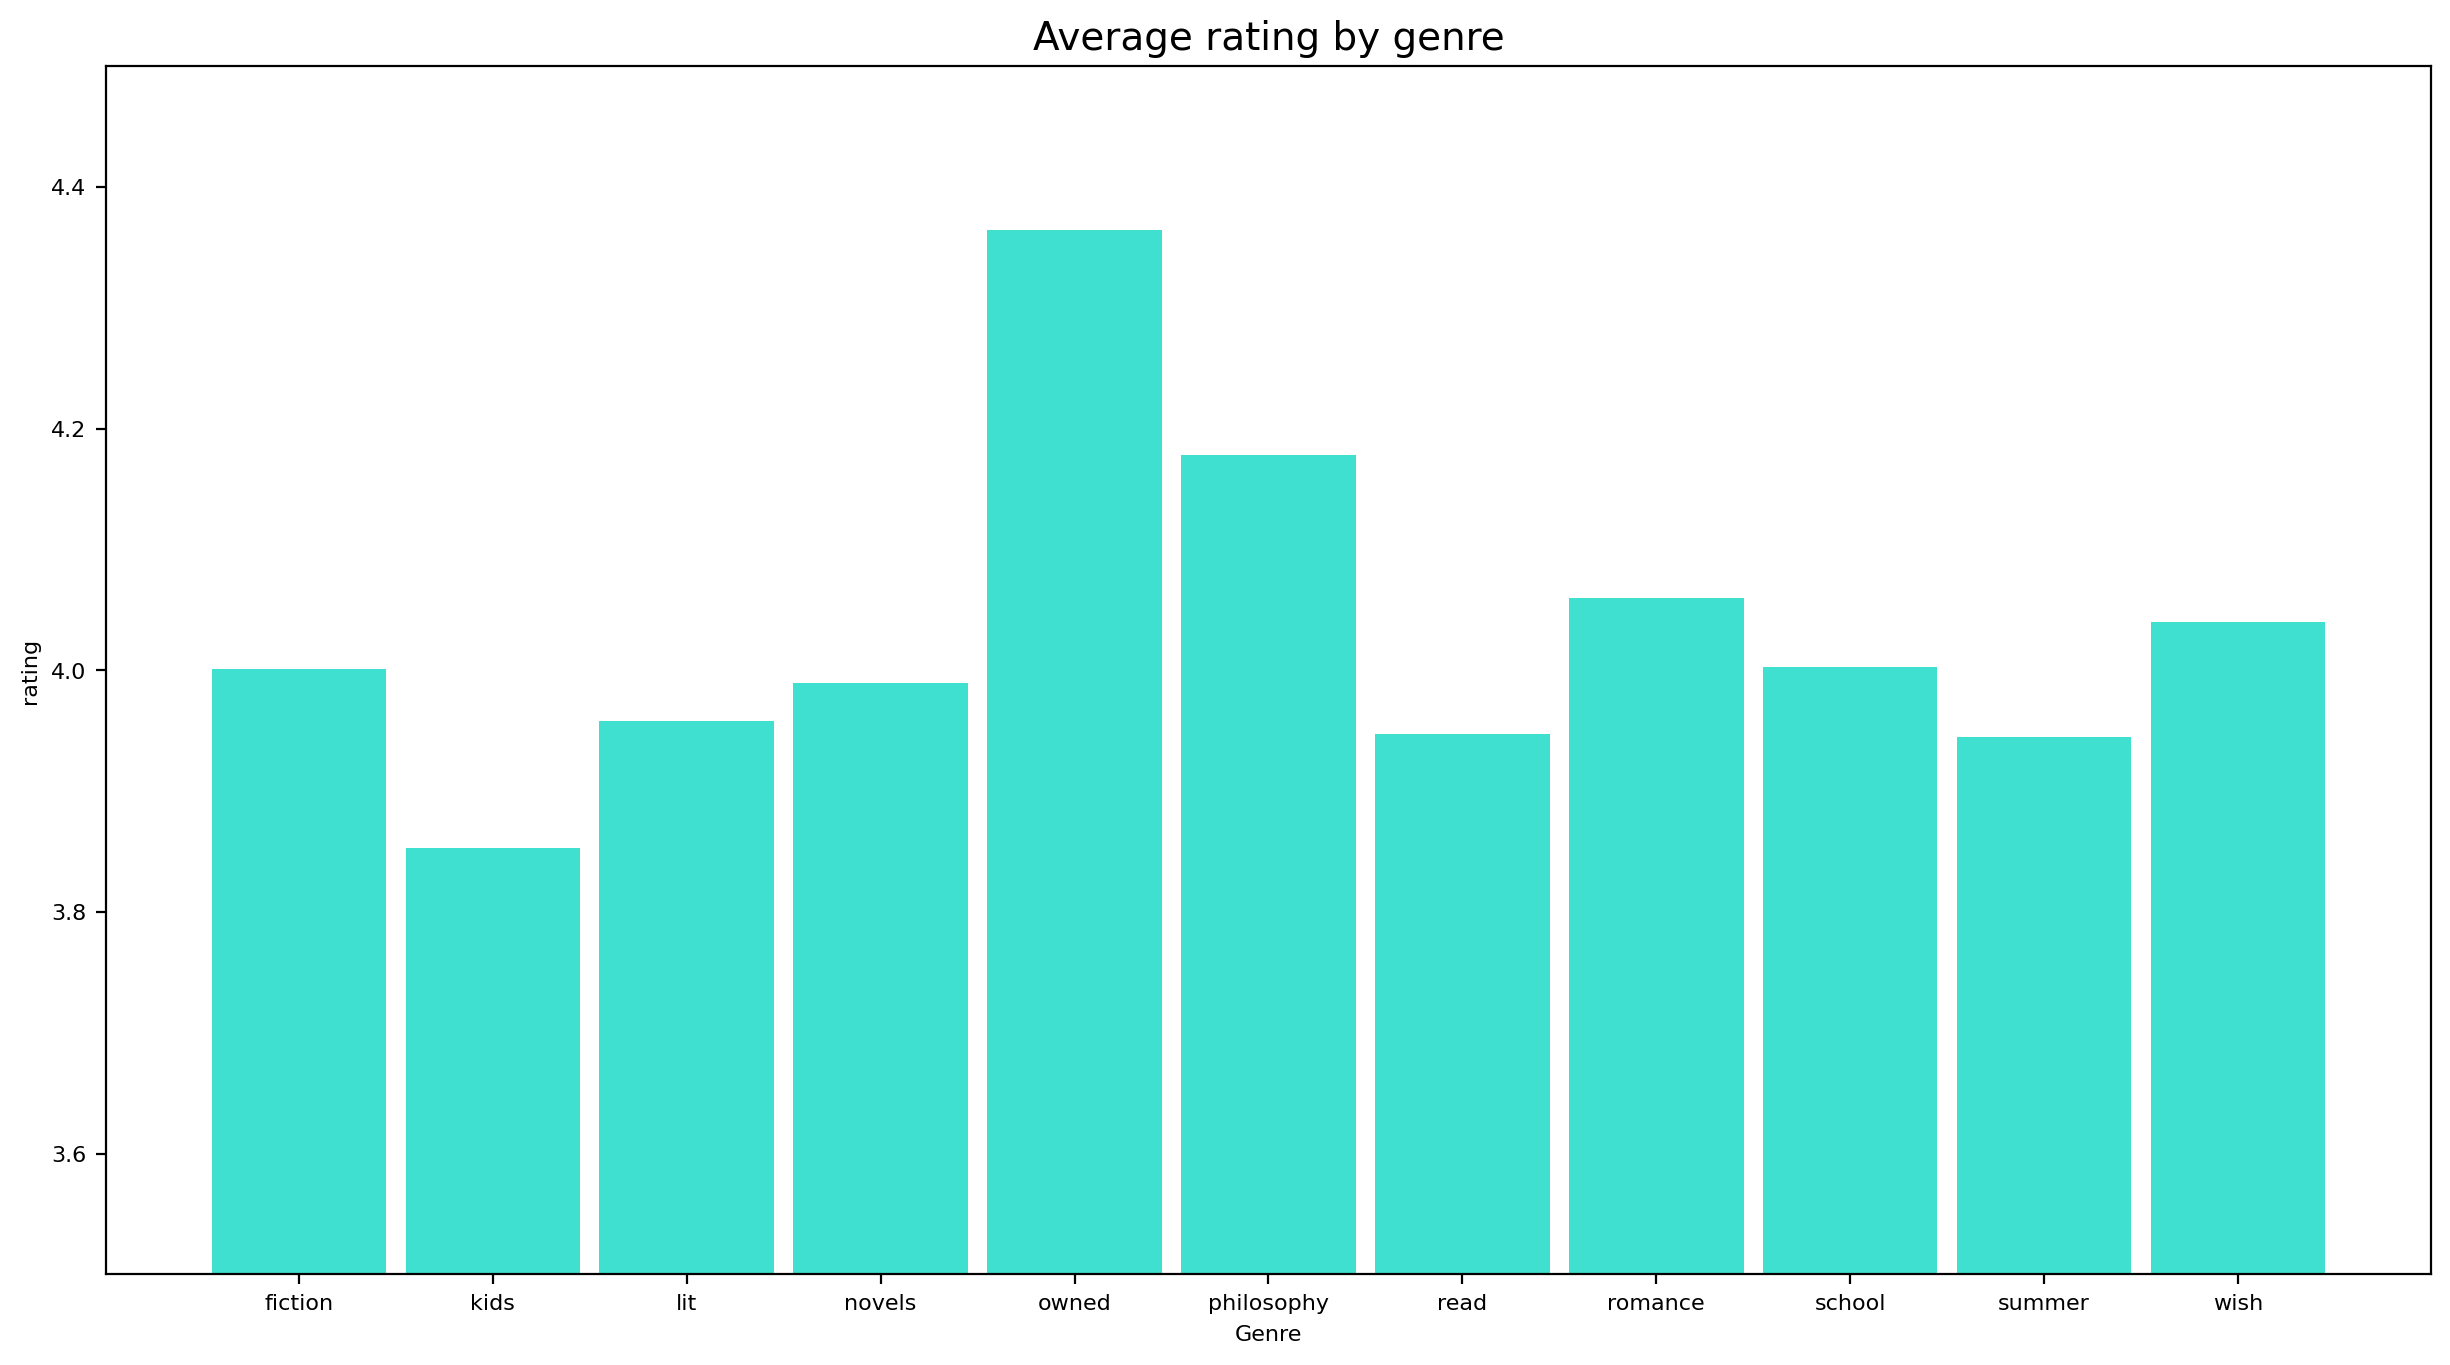

In [116]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 200
plt.rcParams.update({'font.size': 8})
plt.title("Average rating by genre", fontsize=14, fontweight=0)
plt.xlabel("Genre")
plt.ylabel("rating")
plt.ylim(bottom=3.5, top = 4.5)
plt.bar(ratings_df["genre"], ratings_df["average_rating"], width = 0.9, color="turquoise")

### Group the dataset by users, calculate the average of rating for each group and plot the average ratings (x-axis: ratings from 1-5, y-axis: count of users with that average rating)

The first that we have to do is to take the ratings df and calculate the average of rating per user (user a: 2.3, user b:4.1, ... , user n: 4.2) after that we must make a round to leave values only from 1 to 5 then summarize and plot

In [132]:
# average rating per user rounded 
users = (ratings
         .groupby('user_id')['rating']
         .mean())
users = round(users)

In [133]:
#df to be plotted
users_df = (users.value_counts()).to_frame()
users_df

,rating
4.0,33270
3.0,11272
5.0,7571
2.0,1223
1.0,88


<BarContainer object of 5 artists>

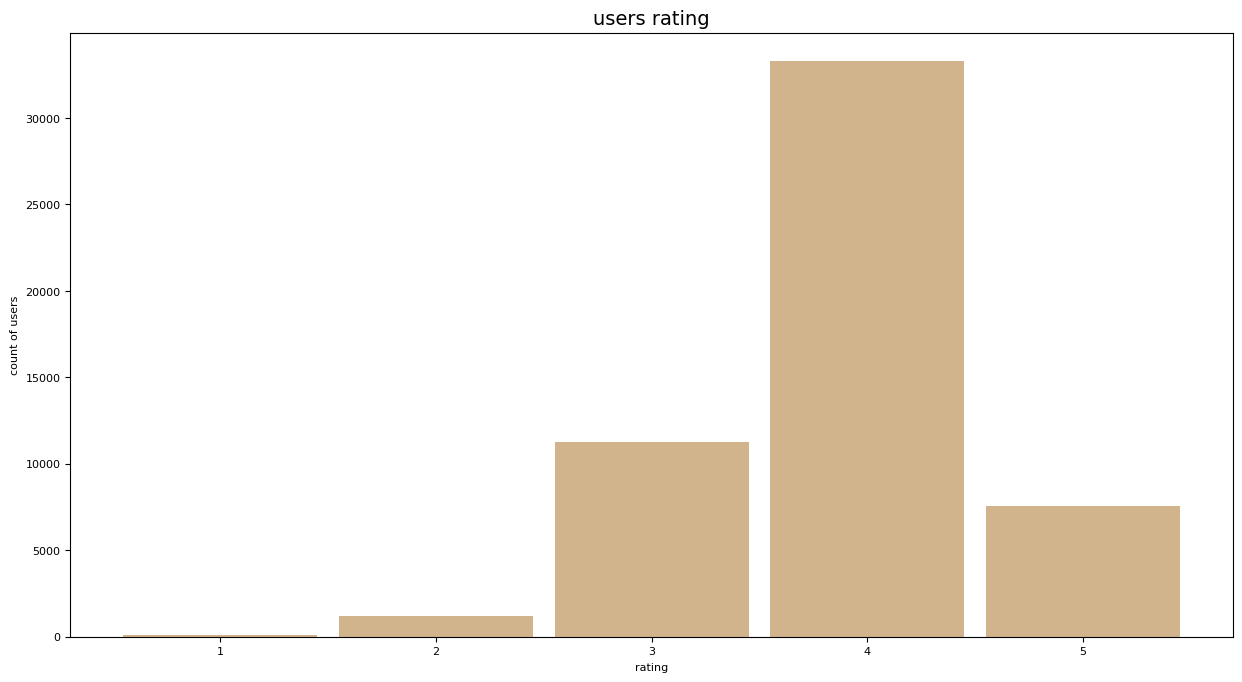

In [139]:
plt.rcParams['figure.figsize'] = [15, 8]
plt.rcParams['figure.dpi'] = 100
plt.rcParams.update({'font.size': 8})
plt.title("users rating", fontsize=14, fontweight=0)
plt.xlabel("rating")
plt.ylabel("count of users")
#plt.ylim(bottom=3.5, top = 4.5)
plt.bar(users_df.index, users_df["rating"], width = 0.9, color="tan")